<a href="https://colab.research.google.com/github/SampadSikder/Nonnegative-Matrix-Factorization-Experimentation/blob/main/NMF_Experimentation_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equations from https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf
Edges after nmf in basis matrix: http://www.cs.cmu.edu/~./changbo/publications/IJPRAI05.pdf

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import numpy
import matplotlib.pyplot as mtp

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Code Library

In [ ]:
import time

def extractFrameFromImage(filePath, imageLimit, frame_rate):
  vidcap = cv2.VideoCapture(filePath)
  success,image = vidcap.read()
  count = 0
  #define framerate
  frame_rate = 10
  prev = 0
  frame=0
  while success:
    time_elapsed = time.time() - prev
    success,image = vidcap.read()  
    if time_elapsed > 1./frame_rate:
      prev = time.time()
      cv2.imwrite("%d.jpg" % count, image)     # save frame as JPEG file      
      #print('Read a new frame: ', success)
      count=count+1
      frame += frame_rate # i.e. at 30 fps, this advances one second
      vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    if count>=imageLimit:
      break
  vidcap.release()
  cv2.destroyAllWindows()

  

In [ ]:
def checkCrop():
  img=cv2.imread('/content/9.jpg')
  img=img[350:600,400:600]
  cv2_imshow(img)

In [ ]:
import os
def countWidthandHeight():
  img=cv2.imread('/content/9.jpg')
  
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1]/7)
  
  height = int(image.shape[0]/7)
  
  print(width, height)

  


  count=0

  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    if extension=='jpg':
      count=count+1

  return width, height, count

In [ ]:
def singleImage():
  img=cv2.imread('/content/Untitled.jpeg')
  
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1])
  
  height = int(image.shape[0])


  dim = (width, height)
  print(width, height)
  #resizing image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

  return image, width, height

In [ ]:
def multiplyImage():
  img=cv2.imread('/content/9.jpg')
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  imageT=np.transpose(image)
  result=np.matmul(image,imageT)

  cv2_imshow(result)


In [ ]:


def convertAllImageToMatrix(width, height, x): # x = number of images
  
 

  y = width*height 

  m = np.zeros(shape=(x, int(y)))
  print(m.shape)
  itr = 0
  name_list = []
  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    if extension=='jpg':
      image_path='/content/'+image_name
      image = cv2.imread(image_path)
      #####flip image
      #image=cv2.flip(image,0)
      #crop image
      #img=image[350:600,400:600]
      #grayscale	
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #resize
      dim = (width, height)
      print(width, height)
      #resizing image
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #rows,cols = resized.shape # gives dimensions for RGB array
      
      rows,cols=resized.shape#normal shape
      img_size = rows*cols
      img_1D_vector = resized.reshape(img_size)
      
      #print(img_1D_vector)
      #np.append(m, img_1D_vector,axis=0)
      m[itr]=img_1D_vector
      itr=itr+1
      name_list.append(image_name)
      print(itr)
      
  return m, name_list, itr

In [ ]:
def normalizeM(m):
  sum=0
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      sum+=m[i][j]
  mean=sum/row*col 

  m=m/mean

  return m, mean

In [ ]:
def updateW(x,w,h):
  #XVT
  ht=np.transpose(h)
  numerator=np.matmul(x,ht)
  #UVVT
  den1=np.matmul(w,h)
  denominator=np.matmul(den1,ht)

  #return
  print('u')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(w,secondPart)

In [ ]:
def updateH(x,w,h):
  #UT*X
  wt=np.transpose(w)
  numerator=np.matmul(wt,x)
  #UTUV
  den1=np.matmul(w,h)
  denominator=np.matmul(wt,den1)
  
  #update return
  print('v')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(h,secondPart)

In [ ]:
def performNMF(x, featureNo, imageCount, EPSILON=1e-9):
  w=abs(np.random.normal(3,2.5,size=(imageCount,featureNo)))
  h=abs(np.random.normal(3,2.5,size=(featureNo, x.shape[1])))

  print("Shape of W: "+str(w.shape))
  print("Shape of H: "+str(h.shape))

  itr=0
  cost=np.linalg.norm(x-np.matmul(w,h))
  while cost>EPSILON:
    if itr%2==0:
      h=updateH(x,w,h)
      #h*=6
    else:
      w=updateW(x,w,h)
      #w/=4
    wh=np.matmul(w,h)
    print(w,h)
    cost=np.linalg.norm(x-wh)
    print(cost)
    if itr>=100:
      break
    itr=itr+1
  return w,h

### Testing Code

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
def getImageListFromM(x_new):
  #print(height,width)
  images = []
  for row in x_new:
    img_data = []
    for i in range(height):
      img_row = []
      for j in range(width):
        img_row.append(row[i*width + j])
      img_data.append(img_row)
    images.append(img_data)
  return images

In [ ]:
def compareAndTest(m, w, h, mean):
  x_new=np.matmul(w,h)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))

  for index in range(m.shape[0]):
    print("-------------------------------Number of image: "+str(index))

    img=np.array(resulting_images[index])
    cv2_imshow(img)
    print("Image after NMF:")

    img=np.array(original_images[index])
    cv2_imshow(img)
    print("Image Before NMF:")


In [ ]:
def variance(m): # m = matrix of all images
  return np.var(m)

In [ ]:
def __grouper(labels, original_images, resulting_images):
    groups = []
    for current_label in set(labels):
      cluster = []
      for index,label in enumerate(labels):
        if label == current_label:
          node = [label, original_images[index], resulting_images[index]]
          cluster.append(node)
      groups.append(cluster)
    return groups

In [ ]:
def compareAndTestWithKNN(m, w, h, mean, n_clusters):
  x_new=np.matmul(w,h)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  kmeans = KMeans(n_clusters, random_state=0)
  kmeans.fit(w)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))
  
  clusters = __grouper(kmeans.labels_, original_images, resulting_images)

  for cluster in clusters:
    print("----------------Labels------------------------")
    for index, node in enumerate(cluster):
      print("-------------------------------Number of image: "+str(index)+"-----------Cluster="+str(node[0])+".")
      img=np.array(node[1])
      cv2_imshow(img)
  
  return kmeans

In [ ]:
def scatterPlot(kmeans,F):
  y_predict= kmeans.fit_predict(F)  
  mtp.scatter(F[y_predict == 0, 0], F[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster  
  mtp.scatter(F[y_predict == 1, 0], F[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
  mtp.scatter(F[y_predict== 2, 0], F[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
  mtp.scatter(F[y_predict == 3, 0], F[y_predict == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
  mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroid')   
  mtp.title('Clusters')  

  mtp.legend()  
  mtp.show() 

# Experimentation Area

In [ ]:
imageLimit = 100
frame_rate=5
extractFrameFromImage('/content/Drive/MyDrive/Colab Notebooks/Dataset/ClothStackDetection.mp4', imageLimit, frame_rate)

KeyboardInterrupt: ignored

In [ ]:
!ls

In [ ]:
width, height, imageCount=countWidthandHeight()

In [ ]:
print(imageCount)

In [ ]:
m, imageNameList, imageCount = convertAllImageToMatrix(width, height, imageCount)


In [ ]:
m.shape

In [ ]:
m

In [ ]:
m, mean = normalizeM(m)

In [ ]:
w,h=performNMF(m, 10, imageCount)

# from sklearn.decomposition import NMF
# nmf_model = NMF(10,max_iter=100)
# w = nmf_model.fit_transform(m)
# h=nmf_model.components_


In [ ]:
compareAndTest(m,w,h, mean)

In [ ]:
x_new=np.matmul(w,h)
x_new=np.ceil(x_new*mean)
x_new=np.transpose(x_new)

print("Original Image Set Variance: "+str(variance(np.ceil(np.transpose(m)*mean))))
print("NMF Generated Image Set Variance: "+str(variance(x_new)))

In [ ]:
w.shape

# Clustering

In [ ]:
kmeans=compareAndTestWithKNN(m,w,h, mean, 3)

In [ ]:
scatterPlot(kmeans,w)

##TEST


In [ ]:
def convertMatrixToImage(x,mean):
  x_new=np.zeros((x.shape[0],x.shape[1]), dtype=int)
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x_new[i][j]=x[i,j]*mean
      x_new[i][j]=math.ceil(x_new[i][j])
  print(x_new)
  return x_new

In [ ]:
m,width,height=singleImage()
print(width,height)

#multiplyImage()

199 253
199 253


In [ ]:
#m,mean=normalizeM(m)
print(m)
w,h=performNMF(m, 10, height)
print(m)
'''
from sklearn.decomposition import NMF
nmf_model = NMF(100,max_iter=100)
w = nmf_model.fit_transform(m)
h=nmf_model.components_
'''

[[ 92  69  47 ... 167 131 118]
 [ 88  47  42 ... 179 157 142]
 [ 70  74  55 ... 141 171 175]
 ...
 [ 51  28  38 ...  86  62 101]
 [ 27  67  28 ...  93  53  99]
 [ 14  92  24 ...  85  67 117]]
Shape of W: (253, 10)
Shape of H: (10, 199)
v
[[0.05204999 3.56720452 4.46738557 ... 8.56538696 3.04115414 3.91595454]
 [5.61928986 5.35845071 1.90293158 ... 3.74326931 0.75623446 3.57759063]
 [6.34032807 1.12874717 6.0174074  ... 6.70805129 3.75409604 2.57973129]
 ...
 [3.40331645 5.164418   3.18166608 ... 4.56846345 2.85550225 0.92919095]
 [2.77651065 2.74606493 3.94011589 ... 1.23263413 3.94683694 6.01118812]
 [3.41049408 3.91774613 3.49762643 ... 3.14761629 1.36478876 0.86939704]] [[0.34666446 2.06948255 0.53976967 ... 2.57640421 1.56733895 3.84334223]
 [1.01494699 0.38320198 1.44849251 ... 0.05058434 0.8735165  0.41689471]
 [1.21534201 0.31964542 0.75422817 ... 1.6866139  0.26195136 0.91342931]
 ...
 [0.93552235 0.54614732 1.12071012 ... 3.66893753 4.64061639 4.1072696 ]
 [0.84656248 0.742411

'\nfrom sklearn.decomposition import NMF\nnmf_model = NMF(100,max_iter=100)\nw = nmf_model.fit_transform(m)\nh=nmf_model.components_\n'

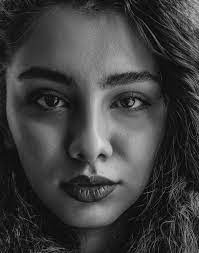

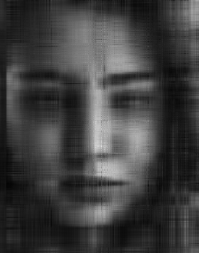

In [ ]:
import math
m=m
cv2_imshow(m)
#cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))
cv2_imshow(np.matmul(w,h))

In [ ]:
#cv2_imshow(convertMatrixToImage(w,mean))
cv2_imshow(np.ceil(w))
print(np.ceil(w))

[[ 2.  1.  2. ... 15.  1.  1.]
 [ 6.  1.  2. ... 13.  1.  1.]
 [ 6.  1.  2. ... 13.  1.  1.]
 ...
 [ 5.  2.  4. ...  7.  1.  4.]
 [ 6.  3.  4. ...  7.  1.  2.]
 [ 6.  2.  3. ...  7.  1.  4.]]


In [ ]:
#cv2_imshow(convertMatrixToImage(h,mean))
print(w.shape)
col=np.transpose(w)
temp=col[0].reshape(11,23)
print(temp)
cv2_imshow(temp)

(253, 10)
[[ 1.39088582  5.06068163  5.78577299  6.99611021  6.04334567  5.80578114
   6.40976611  5.7896205   4.36965627  5.46820948  6.99041747  7.31826882
   7.77943623  8.20551326  8.32499771  7.37575294  6.11194183  5.27509948
   6.16043456  4.77220819  6.3436279   6.92882701  5.72082899]
 [ 4.32393937  4.86809245  6.72512356  5.08434011  6.20725515  7.31828402
   7.95926505  6.88021857  4.55609564  5.95665268  5.88513497  5.10928011
   5.27052277  2.46707675  4.11150469  4.625113    6.07723586  3.72564066
   4.63599804  3.86323668  4.56759622  3.70155527  3.17116601]
 [ 3.57967114  3.11910669  2.85554916  3.7273083   2.4770288   1.99169236
   2.5941004   0.06152752  2.70070878  2.62482947  3.38283079  2.48670374
   2.4731341   2.40261415  2.48972903  2.88101759  2.29774445  0.32199003
   2.01438081  2.21874091  1.17270236  0.56650367  0.2170951 ]
 [ 0.21852035  0.60809659  0.30722884  0.51797366  1.47668181  1.71512045
   2.28262607  1.61211287  3.6656709   3.89020946  4.03217774

In [ ]:
cv2_imshow(np.matmul(w,h))